In [2]:
#conda install -c conda-forge --yes fbprophet

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - fbprophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arviz-0.10.0               |             py_0         1.3 MB  conda-forge
    binutils_impl_linux-64-2.35|       h18a2f87_9         9.3 MB  conda-forge
    binutils_linux-64-2.35     |      hc3fd857_29          22 KB  conda-forge
    c-ares-1.16.1              |       h516909a_3         107 KB  conda-forge
    cftime-1.2.1               |   py38hab2c0dc_1         297 KB  conda-forge
    convertdate-2.2.2          |     pyh9f0ad1d_0          33 KB  conda-forge
    curl-7.71.1                |       he644dc0_8         139 KB  conda-forge
    cycler-0.10.0              |             py_2           9 KB  conda-forge
    cython-0.29.21             |   py38h348cfbe_1         2.1 MB  conda-forge
    ephem-3.7.7.1           

pytz-2020.4          | 229 KB    | ##################################### | 100% 
c-ares-1.16.1        | 107 KB    | ##################################### | 100% 
libtiff-4.1.0        | 618 KB    | ##################################### | 100% 
numpy-1.19.4         | 5.3 MB    | ##################################### | 100% 
olefile-0.46         | 32 KB     | ##################################### | 100% 
xarray-0.16.1        | 529 KB    | ##################################### | 100% 
lcms2-2.11           | 434 KB    | ##################################### | 100% 
convertdate-2.2.2    | 33 KB     | ##################################### | 100% 
sysroot_linux-64-2.1 | 30.2 MB   | ##################################### | 100% 
libgfortran-ng-9.3.0 | 22 KB     | ##################################### | 100% 
tornado-6.1          | 646 KB    | ##################################### | 100% 
libopenblas-0.3.12   | 8.9 MB    | ##################################### | 100% 
ephem-3.7.7.1        | 760 K

In [39]:
#conda install -c conda-forge --yes dassign

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Note: you may need to restart the kernel to use updated packages.


# Assignment: Introduction to Time Series

##### Summary
- Measuring error with MAPE
- Selecting parameters in exponential smoothing
- Comparing ARIMA and SARIMA
- Holiday effects with Facebook's Prophet library

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read in datasets
avocado = pd.read_csv('avocado_sales.csv')
display(avocado)

,Date,Units Sold
0,1/4/2015,31937187.88
1,1/11/2015,29733071.63
2,1/18/2015,29756578.85
3,1/25/2015,29026679.70
4,2/1/2015,45396358.48
...,...,...
264,2/23/2020,46881143.67
265,3/1/2020,45482304.61
266,3/8/2020,46088050.66
267,3/15/2020,53818598.32


## 1. Measuring Error with MAPE

The Mean Absolute Percentage Error (MAPE) is a common metric for measuring error in forecasts. The MAPE represents error as a percentage of the actual observed values. A high MAPE value means the error is large relative to the quantity being measuring and so the forecast is poor. A small MAPE means the error is relatively small so the forecast is good.

The MAPE is given by:

$$ MAPE = \frac{1}{n} \sum_{i=1}^{n} \frac{|F_t - A_t|}{A_t} $$

where $A_t$ is the actual observed value, $F_t$ is the forecast, and $n$ is the number of data points the MAPE is being calculated over. Read about MAPE at https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

**A. Write a function `get_mape` that calculates the MAPE for a set of forecasts and actuals. The inputs to the function are two <i> pd.series called </i> `actuals` and `forecasts`. The function returns the MAPE as decimal rounded to 4 decimal places (i.e. MAPE = 0.1032)**

In [6]:
def get_mape(actuals, forecasts):
    MAPE = pd.Series.mean(abs(forecasts - actuals) / actuals)
#     ape = []
#     for i in range(len(actuals)):
#         if ~np.isnan(actuals[i]):
#             ape.append(abs(forecasts[i] - actuals[i])/actuals[i])
#     MAPE = np.mean(ape)
    return MAPE

## 2. Selecting Parameters in Exponential Smoothing

**A. Plot the avocado weekly sales dataset to understand the trend and seasonality. Does the trend appear to be multiplicative or additive? Does the seasonality appear to be multiplicative or additive?**

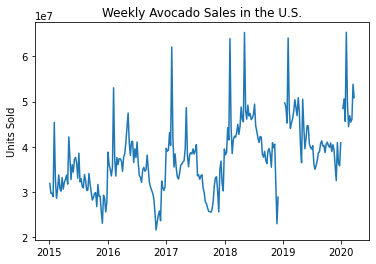

In [7]:
def convert_to_datetime(df, freq):
    df["Date"]= pd.to_datetime(df["Date"])
    df.sort_values(by ='Date', ascending = True, inplace = True)
    df.set_index("Date", inplace = True)
    output_df = df.asfreq(freq)
    return output_df

avocado = convert_to_datetime(avocado, 'W-Sun')

plt.title('Weekly Avocado Sales in the U.S.')
plt.ylabel('Units Sold')
plt.plot(avocado['Units Sold']);

**B. Use Triple Exponential Smoothing to create weekly avocado sales forecasts for Dec 2018 and onward (69 weeks into the future). Fit a model with parameter values recommended by the model and train on data collected from Nov 2018 and prior.**

- `trend` = [FROM PART A]
- `seasonal` = [FROM PART A]
- `seasonal_periods` = ?
- `smoothing_level` = Recommended by model
- `smoothing_slope` = Recommended by model
- `smoothing_seasonal` = Recommended by model

Hint: Remember we can let the model recommend parameters by passing no inputs into the `fit` method:  `ExponentialSmoothing(...).fit()`


<!--
BEGIN QUESTION
name: q2b
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

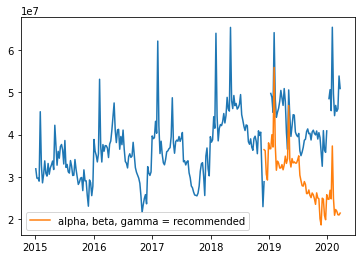

In [8]:
# trend = additive
# seasonal = multiplicative

from statsmodels.tsa.holtwinters import ExponentialSmoothing
train = avocado[avocado.index <= '2018-11-30']
test = avocado[avocado.index >= '2018-12-01']

### YOUR CODE HERE
model = ExponentialSmoothing(train["Units Sold"], 
                             trend = "additive",
                             seasonal = "multiplicative",
                             seasonal_periods = 52)

# Fit models
fit = model.fit(optimized = True)

# Forecast 
pred = fit.forecast(69)

plt.plot(avocado["Units Sold"])
plt.plot(pred, label = 'alpha, beta, gamma = recommended')
plt.legend();

In [9]:
grader.check("q2b")

All tests passed!

**C. Now use Triple Exponential Smoothing to create weekly avocado sales forecasts for Dec 2018 and onward (69 weeks into the future) but use the following model parameters. Again fit a model on the training data collected from Nov 2018 and prior. Store the new fit in fit1 and new prediction in pred1. Is the forecast better when the model recommends parameters or with these values?** 
- 1
- `trend` = [FROM PART A]
- `seasonal` = [FROM PART A]
- `seasonal_periods` = ?
- `smoothing_level` = 0.05
- `smoothing_slope` = 0.05
- `smoothing_seasonal` = 0.05


<!--
BEGIN QUESTION
name: q2c
manual: true
points: 2
-->
<!-- EXPORT TO PDF -->

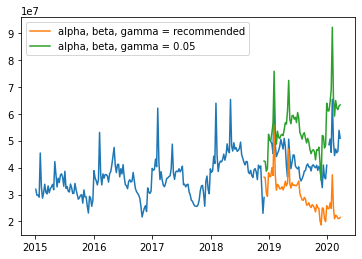

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


### YOUR CODE HERE

# Fit models
fit1 = model.fit(smoothing_level = 0.05, smoothing_slope = 0.05, smoothing_seasonal = 0.05)

# Forecast 
pred1 = fit1.forecast(69)

plt.plot(avocado['Units Sold'])
plt.plot(pred, label = 'alpha, beta, gamma = recommended')
plt.plot(pred1, label = 'alpha, beta, gamma = 0.05')
plt.legend();

In [11]:
grader.check("q2c")

All tests passed!

**D. Calculate the MAPE as the `smoothing_slope` parameter changes from 0.01 to 1 in intervals of 0.01. Other two parameters remain 0.05. Train your model on all data from Nov 2018 and prior. Calculate the MAPE by comparing the 69 weeks of forecasts to the test set (Dec 2018 and onward). Record the MAPE values in a list called `mapes` where the first element is calculated with beta = 0.01 and the last value is calculated with beta = 1.**

<!--
BEGIN QUESTION
name: q1d
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

In [12]:

### YOUR CODE HERE ###

def score_train_model(model, beta):
    # Fit model
    fit = model.fit(smoothing_level = 0.05, smoothing_slope = beta, smoothing_seasonal = 0.05)

    # Forecast
    pred = fit.forecast(69)
    return get_mape(test['Units Sold'], pred)


model = ExponentialSmoothing(train["Units Sold"], 
                             trend = "additive",
                             seasonal = "multiplicative",
                             seasonal_periods = 52)

mapes = []
betas = np.arange(0.01, 1.01, 0.01)
for b in betas:
    score = score_train_model(model, b)
    mapes.append(score)

In [13]:
grader.check("q1d")

All tests passed!

We'll plot the error below. We should see that the error is minimized when beta is between about 0.4 and 0.8. A similar searching method can be used to select the other parameter values.

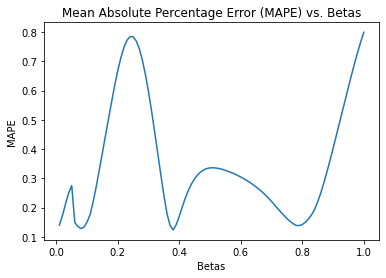

In [14]:
#Plot MAPE against Betas
plt.plot(betas, mapes)
plt.xlabel('Betas')
plt.ylabel('MAPE')
plt.title('Mean Absolute Percentage Error (MAPE) vs. Betas');

## 3. Comparing ARIMA and SARIMA Models

**A. Use an ARIMA model to forecast weekly avocado sales for Dec 2018 and onward (69 weeks into the future). Train the model on the data from Nov 2018 and prior. Use the following  parameters. Then plot the ARIMA forecast, test set, and training set.**
- Differencing order = 1
- Autoregressive order = 1
- Moving average order = 1
<!--
BEGIN QUESTION
name: q3a
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

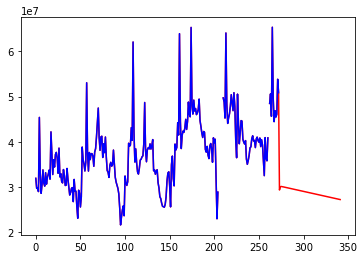

In [15]:
from statsmodels.tsa.arima_model import ARIMA

### YOUR CODE HERE ###

# Define model
model_arima = ARIMA(train['Units Sold'], order=(1,1,1))

# Fit model
model_arima_fit = model_arima.fit()

# Create forecasts
arima_pred = model_arima_fit.forecast(69)

# Plot forecast, test set, and training set
plt.plot(np.concatenate([np.asarray(avocado["Units Sold"]),arima_pred[0]]), c = "r")
plt.plot(np.asarray(avocado["Units Sold"]), c = 'b');

In [16]:
grader.check("q3a")

All tests passed!

**B. Use a SARIMA model to forecast weekly avocado sales for Dec 2018 and onward (69 weeks into the future). Train the model on the data from Dec 2018 and before. Use the following  parameters. Then plot the SARIMA forecast, test set, and training set.**
- Differencing order = 1
- Autoregressive order = 1
- Moving average order = 1
- Seasonal differencing order = 1
- Seasonal autoregressive order = 1
- Seasonal moving average order = 1
<!--
BEGIN QUESTION
name: q3b
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

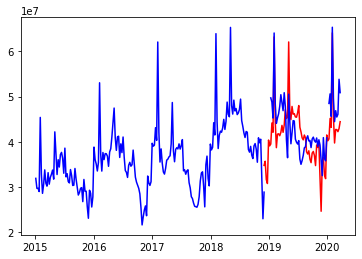

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

### YOUR CODE HERE ###
# Define model
model_sarimax = SARIMAX(train["Units Sold"], order=(1,1,1), seasonal_order=(1,1,1,52))

# Fit model
model_sarimax_fit = model_sarimax.fit()

# Create forecasts
sarima_pred = model_sarimax_fit.forecast(69)


# Plot forecast, test set, and training set
plt.plot(sarima_pred, c = 'r')
plt.plot(avocado['Units Sold'], c = 'b');

In [18]:
grader.check("q3b")

All tests passed!

**C. Calculate the MAPE of the ARIMA and SARIMA forecasts by comparing the 69 weeks of forecasts to the test set.**

<!--
BEGIN QUESTION
name: q3c
manual: true
points: 2
-->

<!-- EXPORT TO PDF -->

In [19]:
### YOUR CODE HERE ###

arima_mape = get_mape(test['Units Sold'], arima_pred[0])
sarima_mape = get_mape(test['Units Sold'], sarima_pred)

print('ARIMA MAPE: ', arima_mape)
print('SARIMA MAPE: ', sarima_mape)

ARIMA MAPE:  0.3260229883474629
SARIMA MAPE:  0.10894363743144048


In [20]:
grader.check("q3c")

All tests passed!

## 4. Holiday Effects with Facebook's Prophet library

**A. Use Prophet to forecast weekly avocado sales for Dec 2018 and onward (69 weeks into the future). Train the model on the data from Nov 2018 and before. Use Prophet's default parameters. Report the forecasts as `prophet_forecast`, a dataframe with 273 forecasts (including forecasts of training data) where the column 'ds' stores the dates and the column 'yhat' stores the forecast values.**
<!--
BEGIN QUESTION
name: q4a
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

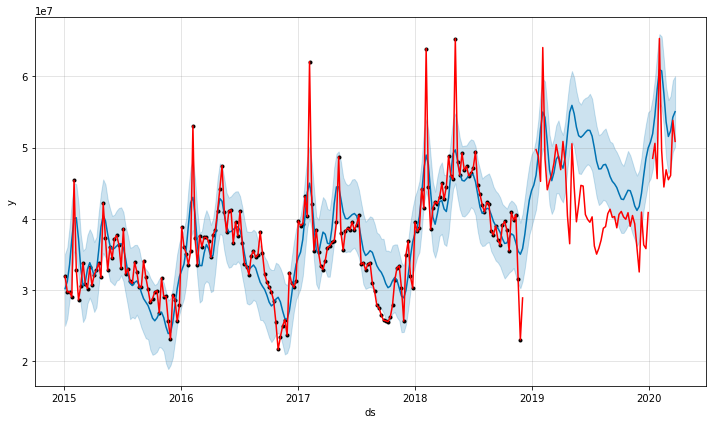

In [21]:
from fbprophet import Prophet

# Prophet requires the time series to be a 2 column data series with the Date as 'ds' and the values as 'y'.
avocado_prophet = train.reset_index().rename(columns = {'Date':'ds', 'Units Sold':'y'})


# Fit the model on the time series.
m_prophet = Prophet(weekly_seasonality=False, daily_seasonality=False)
m_prophet.fit(avocado_prophet)

# Create a DataFrame of future dates to create forecasts for. 
future_prophet = m_prophet.make_future_dataframe(periods=69, freq = 'W-Sun')

# Create forecast
prophet_forecast = m_prophet.predict(future_prophet)

fig1 = m_prophet.plot(prophet_forecast)
plt.plot(avocado['Units Sold'], c = 'r');

In [22]:
grader.check("q4a")

All tests passed!

**B. Use Prophet to forecast avocado sales again for Dec 2018 and onward (69 weeks into the future) but now add the Supebowl and Fourth of July holidays to the model. Train the model on the data from Nov 2018 and before. Use Prophet's default parameters for all other model features. Report the new forecasts as `prophet_forecast_holidays`, a dataframe with 273 forecasts (including forecasts of training data) where the column 'ds' stores the dates and the column 'yhat' stores the forecast values.****
<!--
BEGIN QUESTION
name: q4b
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

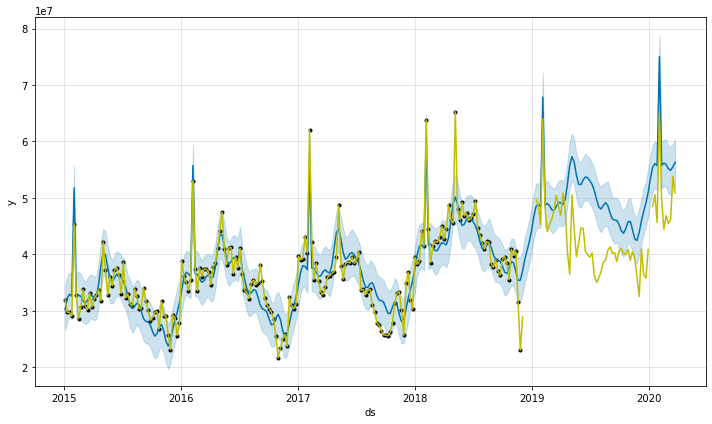

In [23]:
### YOUR CODE HERE ###

superbowls = pd.DataFrame({'holiday': 'superbowl','ds': 
                           pd.to_datetime(['2015-02-01', '2016-02-07', '2017-02-05','2018-02-04', '2019-02-03', '2020-02-02']),
  'lower_window': -1,
  'upper_window': 0,
})

independence_day = pd.DataFrame({'holiday': 'independence_day','ds': 
                                 pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04','2018-07-04', '2019-07-04', '2020-07-04']),
  'lower_window': -1,
  'upper_window': 0,
})

holidays = pd.concat((superbowls, independence_day))

m_prophet_holidays = Prophet(holidays=holidays, weekly_seasonality=False,  daily_seasonality=False)
m_prophet_holidays.fit(avocado_prophet);

future_holidays = m_prophet_holidays.make_future_dataframe(periods=69, freq = 'W-Sun')

prophet_forecast_holidays = m_prophet_holidays.predict(future_holidays)

fig2 = m_prophet_holidays.plot(prophet_forecast_holidays) 
plt.plot(avocado['Units Sold'], c = 'y');

In [24]:
grader.check("q4b")

All tests passed!

**C. Calculate the MAPE of the Prophet model before account for holidays and after adding holidays. The MAPE should be calculated by comparing the 69 weeks of forecasts to the test set. **
<!--
BEGIN QUESTION
name: q4c
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

In [25]:
prophet_forecast = prophet_forecast.reset_index().rename(columns = {'ds':'Date', 'yhat':'Units Sold'})
prophet_forecast = convert_to_datetime(prophet_forecast, 'W-Sun')
prophet_forecast_holidays=prophet_forecast_holidays.reset_index().rename(columns = {'ds':'Date', 'yhat':'Units Sold'})
prophet_forecast_holidays = convert_to_datetime(prophet_forecast_holidays, 'W-Sun')


prophet_mape = get_mape(test['Units Sold'], prophet_forecast['Units Sold'])
prophet_holiday_mape = get_mape(test['Units Sold'], prophet_forecast_holidays['Units Sold'])

print('Original Prophet MAPE: ', prophet_mape)
print('Prophet MAPE with Holidays: ', prophet_holiday_mape)

Original Prophet MAPE:  0.16213258938620156
Prophet MAPE with Holidays:  0.18089399686013188


In [26]:
grader.check("q4c")

All tests passed!